El coeficiente de proporcionalidad es 3.133609342902462e-08
64.06927798564716


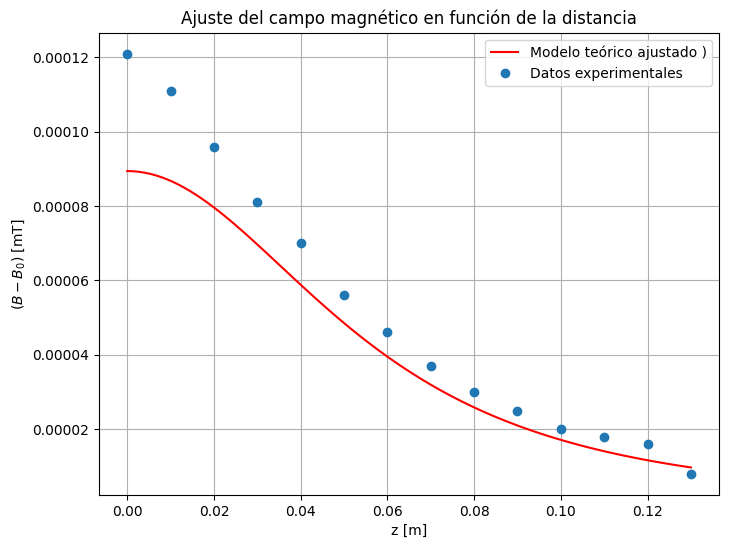

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize

# Constantes dadas
mu0 = 4 * np.pi * 10**(-7)  # permeabilidad del vacío
R = 0.0705  # radio promedio [m]
N = 10  # número de vueltas
B0 = 0.061  # mT (ajuste)
sigma_B = 0.02
 # incertidumbre [mT]

# Datos experimentales de la tabla (distancias en cm convertidas a m y B en mT)
z_exp = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]) * 1e-2  # [m]
B_exp = np.array([0.121, 0.111, 0.096, 0.081, 0.070, 0.056, 0.046, 0.037, 0.030, 0.025, 0.020, 0.018, 0.016, 0.008])*1e-3  # [mT]

# Función teórica B(z) = A / (z^2 + R^2)^(3/2)
def B_teo(z, A):
    return A / (z**2 + R**2)**(3/2)

# Función de chi cuadrado
def chi_squared1(A):
    B_model = B_teo(z_exp, A)
    chi2 = np.sum(((B_exp - B_model))**2)
    return chi2
valor_inicial=1
# Utilizar minimize para encontrar que minimice la función objetivo
resultado = optimize.minimize(chi_squared1, valor_inicial)

# El valor de Rv que minimiza la función objetivo
min = resultado.x[0]

print("El coeficiente de proporcionalidad es", min)


# Graficamos los datos experimentales y el modelo teórico ajustado
z_fit = np.linspace(0, 0.13, 100)  # rango de z para graficar el ajuste
B_fit = B_teo(z_fit, min)
chi2_opt = chi_squared1(min)/0.000006**2
print(chi2_opt)
# Graficamos
plt.figure(figsize=(8, 6))
plt.errorbar(z_exp, B_exp, fmt='o', label='Datos experimentales', capsize=5)
plt.plot(z_fit, B_fit, label=f'Modelo teórico ajustado )', color='red')
plt.xlabel('z [m]')
plt.ylabel('$(B - B_0)$ [mT]')
plt.title('Ajuste del campo magnético en función de la distancia')
plt.legend()
plt.grid(True)
plt.show()



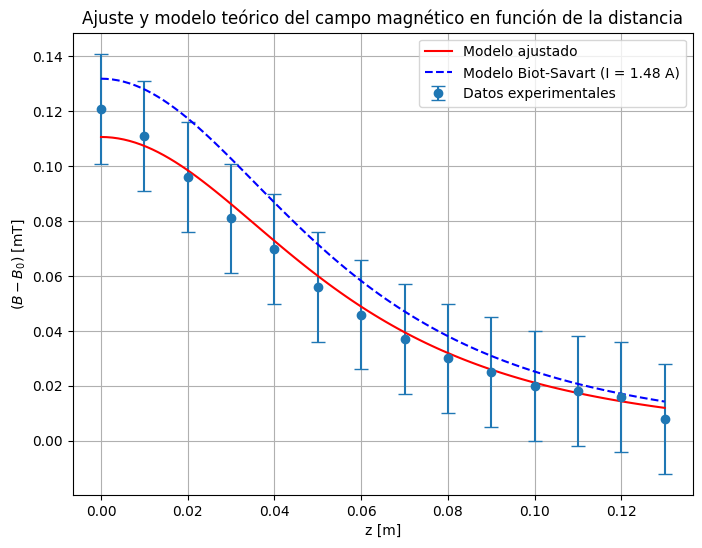

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constantes dadas
mu0 = 4 * np.pi * 10**(-7)  # permeabilidad del vacío [T*m/A]
R = 0.0705  # radio promedio [m]
vueltas = 10  # número de vueltas
I = 1.48  # corriente [A]
B0 = 0.061  # mT (ajuste)
sigma_B = 0.02  # incertidumbre [mT]

# Datos experimentales de la tabla (distancias en cm convertidas a m y B en mT)
z_exp = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]) * 1e-2  # [m]
B_exp = np.array([0.121, 0.111, 0.096, 0.081, 0.070, 0.056, 0.046, 0.037, 0.030, 0.025, 0.020, 0.018, 0.016, 0.008])  # [mT]

# Función teórica ajustada B(z) = A / (z^2 + R^2)^(3/2)
def B_teo(z, A):
    return A / (z**2 + R**2)**(3/2)

# Función del campo magnético teórico según la ley de Biot-Savart
def B_biot_savart(z):
    return (mu0 * vueltas * I * R**2) / (2 * (R**2 + z**2)**(3/2))



# Generamos los datos para las gráficas
z_fit = np.linspace(0, 0.13, 100)  # rango de z para graficar el ajuste
B_fit = B_teo(z_fit, min)
B_biot_fit = B_biot_savart(z_fit) * 1e3  # Convertimos de T a mT

# Graficamos
plt.figure(figsize=(8, 6))
plt.errorbar(z_exp, B_exp, yerr=sigma_B, fmt='o', label='Datos experimentales', capsize=5)
plt.plot(z_fit, B_fit, label=f'Modelo ajustado ', color='red')
plt.plot(z_fit, B_biot_fit, label=f'Modelo Biot-Savart (I = {I:.2f} A)', color='blue', linestyle='--')
plt.xlabel('z [m]')
plt.ylabel('$(B - B_0)$ [mT]')
plt.title('Ajuste y modelo teórico del campo magnético en función de la distancia')
plt.legend()
plt.grid(True)
plt.show()
